In [1]:
import numpy as np
from scipy.fftpack import fft,fft2
from matplotlib import pyplot as plt

In [2]:
l = np.load("data/000090.npy")

In [3]:
print("\nSum of l : ", np.sum(l))
print()
print("Sum of l(axis = 0) : ", np.sum(l, axis = 0)) 
print("Sum of l(axis = 1) : ", np.sum(l, axis = 1))
print("Sum of l(axis = -1) : ", np.sum(l, axis = -1))


Sum of l :  (85.25-644.3125j)

Sum of l(axis = 0) :  [[ 0.01529884+0.16252804j  0.09307098+0.29013634j  0.11868   +0.14532089j
  ... -0.12872887-0.0983839j   0.18047667+0.07643688j
  -0.08067322-0.04322624j]
 [-0.00622368+0.1775055j   0.08593655+0.29672813j  0.10271549+0.16098785j
  ... -0.12521887-0.10462475j  0.18272972+0.0877462j
  -0.0794239 -0.04772568j]
 [-0.02954197+0.18942642j  0.07787609+0.30309105j  0.08445549+0.17405319j
  ... -0.12109184-0.11098862j  0.18387413+0.09973741j
  -0.07746506-0.05216026j]
 ...
 [ 0.06503296+0.10199165j  0.10900688+0.27104568j  0.1496172 +0.0875349j
  ... -0.13659076-0.08106804j  0.1685729 +0.04758358j
  -0.08040428-0.03006172j]
 [ 0.05131721+0.12440777j  0.10452127+0.2770977j   0.14235973+0.10814571j
  ... -0.13440657-0.08649254j  0.1732626 +0.05625248j
  -0.08117867-0.03428268j]
 [ 0.03462982+0.14471912j  0.09923172+0.28354645j  0.13197708+0.12757635j
  ... -0.131746  -0.09229946j  0.1772914 +0.06592059j
  -0.08125877-0.03871155j]]
Sum of l(axi

In [11]:
def cartesianToPolar(x, y):
    """ Cartesian to Polar """
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def polarToCartesian(rho, phi):
    """ Polar to Cartesian """
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def complexTo2Channels(target_array):
    """ transfer complex a + bi to [a, b]"""
    assert target_array.dtype == np.complex64
    output_array = getMagnitude(target_array)
    output_array = getLog(output_array)
    return output_array

def getMagnitude(target_array, power_order=2):
    """ get magnitude out of complex number """
    target_array = np.abs(target_array)
    target_array = pow(target_array, power_order)
    return target_array 

def getLog(target_array, scalar=1., log_10=True):
    """ get Log values """
    if log_10:
        return scalar * np.log10(target_array + 1.)
    else:
        return target_array

def getSumDim(target_array, target_axis):
    """ sum up one dimension """
    output = np.sum(target_array, axis=target_axis)
    return output 


def Cartesian(RA_mask, radar_config, gapfill_interval_num=1):
    # convert input (range_azimuth) to Cartesian for plotting
    output_mask = np.ones([RA_mask.shape[0], RA_mask.shape[0]*2]) * np.amin(RA_mask)
    point_angle_previous = None
    for i in range(RA_mask.shape[0]):
        for j in range(1, RA_mask.shape[1]):
            if RA_mask[i, j] > 0:
                point_range = ((radar_config["range_size"]-1) - i) * radar_config["range_resolution"]
                point_angle = (j * (2*np.pi/radar_config["azimuth_size"]) - np.pi) /(2*np.pi*0.5*radar_config["config_frequency"]/ radar_config["designed_frequency"])
                point_angle_current = np.arcsin(point_angle)
                if point_angle_previous is None:
                    point_angle_previous = point_angle_current
                for point_angle in np.linspace(point_angle_previous, point_angle_current, gapfill_interval_num):
                    point_zx = polarToCartesian(point_range, point_angle)
                    new_i = int(output_mask.shape[0] - np.round(point_zx[0]/radar_config["range_resolution"])-1)
                    new_j = int(np.round((point_zx[1]+50)/radar_config["range_resolution"])-1)
                    output_mask[new_i,new_j] = RA_mask[i, j] 
                point_angle_previous = point_angle_current
    return output_mask

In [88]:
RAD = l

RA = getLog(getSumDim(getMagnitude(RAD, power_order=2), target_axis = -1), scalar=10, log_10=True)
RD = getLog(getSumDim(getMagnitude(RAD, power_order=2), target_axis = 1), scalar=10, log_10=True)


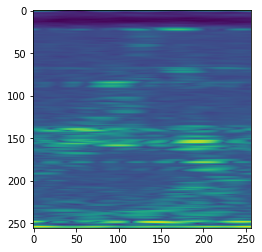

In [89]:
plt.imshow(RA)
plt.show()

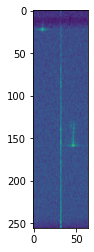

In [90]:
plt.imshow(RD)
plt.show()

In [15]:
radar_config = {
				"designed_frequency" : 76.8,
				"config_frequency" : 77,
				"range_size" : 256,
				"doppler_size" : 64,
				"azimuth_size" : 256,
				"range_resolution" : 0.1953125,
				"angular_resolution" : 0.006135923,
				"velocity_resolution" : 0.41968030701528203
		}

In [16]:
RA_cart = Cartesian(RA, radar_config, gapfill_interval_num=1)

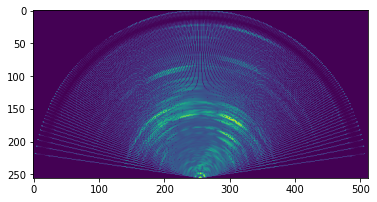

In [17]:
#interpolation with single gapfill interval
plt.imshow(RA_cart)
plt.show()

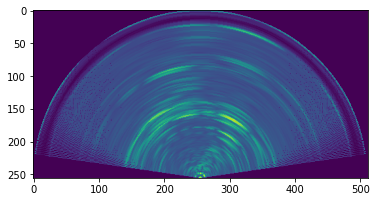

In [18]:
RA_cart1 = Cartesian(RA, radar_config, gapfill_interval_num=5)
plt.imshow(RA_cart1)
plt.show()

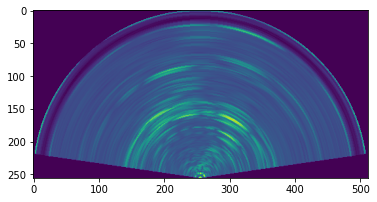

In [19]:
RA_cart2 = Cartesian(RA, radar_config, gapfill_interval_num=15)
plt.imshow(RA_cart2)
plt.show()

In [71]:
y = RD

In [72]:
y.shape

(256, 64)

In [73]:

#2D-CFAR on noise 
Tr = 10
Td = 8

Gr = 4
Gd = 4

offset = 1.4

Nr = 256
Nd = 64

In [78]:
for i in range((Tr+Gr-1),(Nr//2 - (Tr+Gr))):
    for j in range((Td + Gd -1),(Nd - (Td + Gd))):
        noise_level = 0
        for p in range((i -(Tr+Gr)),(i + (Tr+Gr))):
            for q in range((j - (Td+Gd)),(j + (Td+Gd))):
                if((abs(i-p)>= Gr)or(abs(j-q)>= Gd)):
                    noise_level = noise_level + np.exp(y[p][q])
        zx = noise_level/((2*(Td+Gd+1)*2*(Tr+Gr+1))-(4*(Gr+1)*(Gd+1)))
        if zx < 1.0:
            zx = 2.0
        threshold = np.log(zx)
        threshold = threshold + offset
        print(threshold)
        CUT = y[i][j]
        if (CUT <= threshold):
            y[i][j] = 0.0
        else:
            y[i][j] = 1.0

78.32259515581276
78.32259515537108
78.32259515502243
78.32259515447912
78.322595154276
78.3225951529991
78.32259514762923
78.32259513676078
78.32259512560148
78.32259500140759
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
57.630659978567756
57.914911873171
58.15750565906758
58.30954047982985
58.402639690337665
58.44168025442351
58.48081883902158
78.32259515617918
78.32259515572053
78.32259515528288
78.32259515474789
78.32259515444836
78.32259515316883
78.32259514772478
78.32259513684784
78.32259512563402
78.32259500142884
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
57.7452785414616
58.03490279836716
58.26226565440248
58.41008706186922
58.49494397331853
58.53212788478781
58.56987003328193
78.32259515628066
78.32259515580152
78.32259515536208
78.322595154806
78.32259515450228
78.32259515322055
78.32259514775657
78.32259513687838
78.32259512565459
78.32259500143984
78.32975112300693
78.3

/tmp/ipykernel_41780/2878137018.py:7: RuntimeWarning: overflow encountered in exp
  noise_level = noise_level + np.exp(y[p][q])


59.61390695023266
59.85194765177338
59.72220689038451
59.6346960033771
59.55686151884219
59.450373254633476
59.25893995927889
59.10462247415839
58.928706527815706
58.72227322405618
58.431421745343016
57.48654479175912
56.56880313332292
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
56.68825007745674
57.32025125299686
58.34726525075874
58.80814081202956
58.94862416800209
59.017353330953604
59.07976020806011
59.20067508131581
59.34485601416083
59.459840106734624
59.54879505341852
59.82760055586152
59.69904060073113
59.61533741702779
59.54436201725328
59.44266293419191
59.23461372688867
59.09110923030807
58.91265889160846
58.71956974394947
58.43185096780431
57.49336915984955
56.56147711617847
2.0931

59.13530363520954
59.27204181836861
59.35068511786926
59.40634328199613
59.50135694461415
59.946293909612955
59.81410643005158
59.71800303480799
59.72174702577751
59.5905728255696
59.4633172375363
59.32437783453431
59.14331631806662
58.76687925053396
58.501979249140135
58.33862128987766
57.62915893604694
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
57.23718746825002
57.98729368753709
58.48454506962802
58.769383980911535
58.887159360524464
59.00200419383128
59.18789317370964
59.321367788531404
59.38380334923149
59.44116588820772
59.53613524740442
59.98911437866201
59.86386896141795
59.768890304296264
59.77223553898253
59.63951091388857
59.522690643816844
59.391230706238574
59.16561113021548
58.8

59.363607354952336
59.4598081905269
59.53916821081392
59.583538607965494
59.615394907610444
60.15950833801129
60.08967044107069
60.00311598710524
59.919292700088484
59.787157475846165
59.66956860678197
59.282478294576045
59.025805683885764
58.63976206827251
58.30978248989537
57.927135776438966
57.60976099287695
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
2.0931471805599453
57.15774660230609
57.745920810023904
58.39001086275024
58.71601879526322
58.995567946969366
59.20986220856499
59.37543312080217
59.48547261427221
59.54807665952056
59.59505867069717
59.62935682889158
60.14176684233642
60.07769055903769
59.98839469471255
59.902600288895215
59.77813072068113
59.66173010426082
59.27051176895053
59.01027025301618


73.40846057317832
73.4084605495072
73.40846045429589
73.40846045411372
73.4084604919355
73.40846052667202
73.40846052888818
73.40846048910738
73.40846047097152
73.40846044348413
73.40846051568805
73.40846052461116
73.408460535136
73.4084605642151
73.40846048168905
73.40846050611563
73.4084605187419
73.4084605013461
73.40846051127633
73.40846054643299
73.40846045364071
73.40846058831421
73.40846078866929
73.40846098856848
60.200715458826245
60.20878642785823
60.191784008959566
60.207757470935356
60.22384835516689
60.28704087019628
60.31645170489425
60.465712524958235
60.43839737777801
60.3904362014451
60.35816309446137
60.30346160597035
60.25738356496311
60.15895666920437
60.07624762597078
60.01781639158317
59.93680762088492
73.65001684433491
73.65001683276957
73.6500167625485
73.65001675931178
73.65001678970378
73.65001682374114
73.65001682765075
73.65001679869752
73.65001678279674
73.65001676303437
73.65001681689498
73.65001682119706
73.65001682926051
73.65001685173785
73.650016776545

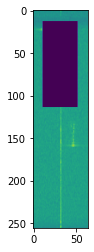

In [79]:
plt.imshow(y)
plt.show()

In [38]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp



def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,5)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background

    return detected_peaks


In [80]:
print(RD)

[[51.672894 53.670193 53.243214 ... 48.639862 53.426548 53.722797]
 [51.264805 51.55951  53.80415  ... 48.637104 51.610836 53.097153]
 [50.173676 53.027924 53.867874 ... 52.279427 54.87335  49.73265 ]
 ...
 [55.394474 56.453476 54.51129  ... 53.381992 52.771553 55.13777 ]
 [54.677704 51.95595  53.991505 ... 53.403107 53.144    52.165894]
 [48.875328 51.419983 48.98053  ... 52.735443 51.405144 50.456833]]


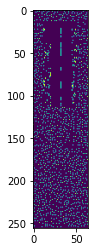

In [39]:
t = RD
x = detect_peaks(t)
plt.imshow(x)
plt.show()